In [165]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn/botswana_bank_customer_churn.csv


# <span style="color:pink">**Importing**</span>

In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,f1_score
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# <span style="color:pink">**Veri Seti Tanıtımı**</span>

* <p style="color: black; font-size: 14px;">
     <strong> Bu veri seti, müşterilerin demografik bilgileri, finansal durumları ve davranışlarına ilişkin çeşitli özellikleri içermektedir. Veriler, müşteri kaybı (churn) ile ilişkili faktörleri analiz etmek amacıyla toplanmıştır. Amaç, müşterilerin hangi özelliklere sahip olduğunda churn etme olasılığının arttığını belirlemek ve bu duruma karşı stratejiler geliştirmektir.</strong>
 </p>
 
* <p style="color: black; font-size: 14px;">
    <strong> Ayrıca, müşteri churn'ünü tahmin etmek ve churn'ün altında yatan nedenleri analiz etmek hedeflenmektedir. Veri setindeki demografik ve finansal özellikler kullanılarak, hangi özelliklerin churn üzerinde etkili olduğu araştırılacaktır.</strong>
</p>

* <p style="color: black; font-size: 14px;">
    <strong> Aşağıda bu veri setinin içinden seçip kullandığım sütunlar yer almakta.</strong>
</p>


<table style="color: blue; border: 1px solid black;width: 100%;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Sütun Adı</th>
    <th style="border: 1px solid black; padding: 8px;">Açıklama</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Gender</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin cinsiyeti</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Marital Status</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin medeni durumu</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Income</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin yıllık geliri (float)</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Education Level</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin eğitim seviyesi</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Customer Tenure</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin şirkette geçirdiği süre (yıl olarak)</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Preferred Communication Channel</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin tercih ettiği iletişim kanalı</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Credit Score</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin kredi skoru (int)</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Outstanding Loans</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin kalan kredi borcu (float)</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Churn Flag</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin churn durumu (1 = churn etmiş, 0 = churn etmemiş)</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Balance</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin mevcut bakiyesi</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">NumOfProducts</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin kullandığı ürün sayısı</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">NumComplaints</td>
    <td style="border: 1px solid black; padding: 8px;">Müşterinin yaptığı şikayet sayısı</td>
  </tr>
</table>


# <span style="color:pink">**Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)**</span>

In [167]:
df = pd.read_csv("/kaggle/input/bank-customer-churn/botswana_bank_customer_churn.csv")

In [168]:
df.shape #115640 gözlem,25 sütun içerir.

(115640, 25)

In [169]:
df.head()

,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,...,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints
0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,...,Phone,397,24,41959.74,0,NaN,NaN,211359.05,1,0
1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,...,Email,665,10,8916.67,0,NaN,NaN,30624.76,4,1
2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,...,Email,715,21,43270.54,0,NaN,NaN,111956.61,2,6
3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,...,Phone,747,17,17887.65,0,NaN,NaN,201187.61,1,0
4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,...,Email,549,25,32686.84,0,NaN,NaN,60391.24,5,6


In [170]:
df = df.drop(['RowNumber','CustomerId','Surname','First Name','Date of Birth','Number of Dependents','Occupation','Address','Contact Information','Customer Segment',
'Credit History Length','Churn Reason','Churn Date'], axis=1)

*  <p style="color: black; font-size: 14px;">
      <strong>Model eğitimi ve veri analizi için doğrudan anlamlı olmayan, fazla bilgi sunmayan sütunlar çıkarıldı. Bu sütunlar, overfitting yapmasına yani veriye aşırı uyum sağlamasına neden olabilecek sütunlar ve daha sade bir analiz için çok karmaşık olan özelliklerdi.</strong>
  </p>

In [171]:
df.isnull().sum()

Gender                             0
Marital Status                     0
Income                             0
Education Level                    0
Customer Tenure                    0
Preferred Communication Channel    0
Credit Score                       0
Outstanding Loans                  0
Churn Flag                         0
Balance                            0
NumOfProducts                      0
NumComplaints                      0
dtype: int64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender                           115640 non-null  object 
 1   Marital Status                   115640 non-null  object 
 2   Income                           115640 non-null  float64
 3   Education Level                  115640 non-null  object 
 4   Customer Tenure                  115640 non-null  int64  
 5   Preferred Communication Channel  115640 non-null  object 
 6   Credit Score                     115640 non-null  int64  
 7   Outstanding Loans                115640 non-null  float64
 8   Churn Flag                       115640 non-null  int64  
 9   Balance                          115640 non-null  float64
 10  NumOfProducts                    115640 non-null  int64  
 11  NumComplaints                    115640 non-null  int64  
dtypes:


 *  <p style="color: black; font-size: 14px;">
      <strong>12 tane değişkeninin 4 tanesi kategorik,diğerleri integer tipinde değişkenlerdir.</strong>
  </p>

In [173]:
df.describe()

,Income,Customer Tenure,Credit Score,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
count,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000
mean,52641.363046,15.490591,574.299775,25502.731792,0.121878,124639.209748,2.999274,4.991724
std,27429.756390,8.654217,159.067499,14127.859827,0.327147,72210.476638,1.411361,3.159283
min,5000.960000,1.000000,300.000000,1000.430000,0.000000,1.060000,1.000000,0.000000
25%,28857.070000,8.000000,436.000000,13226.060000,0.000000,61991.915000,2.000000,2.000000
50%,52658.110000,15.000000,574.000000,25505.285000,0.000000,124505.890000,3.000000,5.000000
75%,76364.157500,23.000000,712.000000,37742.250000,0.000000,187122.922500,4.000000,8.000000
max,99999.510000,30.000000,850.000000,49999.690000,1.000000,249998.910000,5.000000,10.000000


In [174]:
# Her sütundaki unique değerleri öğrenmek
for column in df.columns:
    unique_values = df[column].nunique()
    print(f'{column}: {unique_values} unique values')

Gender: 2 unique values
Marital Status: 3 unique values
Income: 114953 unique values
Education Level: 4 unique values
Customer Tenure: 30 unique values
Preferred Communication Channel: 2 unique values
Credit Score: 551 unique values
Outstanding Loans: 114298 unique values
Churn Flag: 2 unique values
Balance: 115387 unique values
NumOfProducts: 5 unique values
NumComplaints: 11 unique values


In [175]:
# Veri setinin bir kopyasını oluşturmak
df_copy = df.copy()

# Churn Flag değişkenini kopya üzerinde kategorik hale getirmek
df_copy['Churn Flag'] = df_copy['Churn Flag'].map({0: 'No', 1: 'Yes'}).astype('category')

print(df_copy['Churn Flag'].head())  # Kopyada yapılan değişikliği kontrol et

0    No
1    No
2    No
3    No
4    No
Name: Churn Flag, dtype: category
Categories (2, object): ['No', 'Yes']


# <span style="color:pink">**Veri Görselleştirme**</span>
<p style="font-size: 15px; color: black;"><strong>
    Verilerin analiz edilmesi ve anlamlı sonuçlar elde edilmesi amacıyla, müşteri davranışlarını ve özelliklerini daha net gösterebilmek için çeşitli görselleştirme teknikleri kullanılmıştır. Aşağıda, müşteri kaybı (churn) oranları ve diğer önemli özellikler ile ilgili oluşturulan grafikleri görebilirsiniz.</strong>
</p>

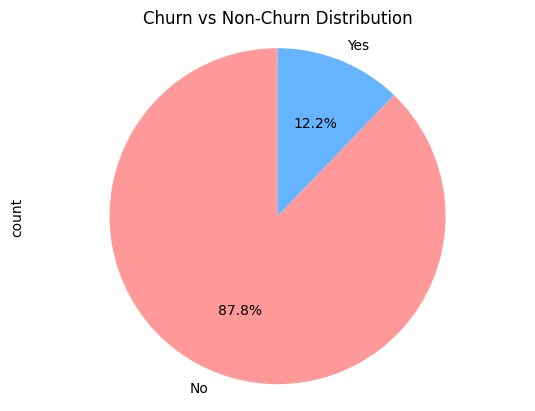

In [176]:
df_copy['Churn Flag'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90) # Churn Flag kategorilerinin oranlarını gösterelim
plt.title('Churn vs Non-Churn Distribution')
plt.axis('equal') #daire olarak ayarla
plt.show()

* <p style="color: black; font-size: 14px;">
     <strong> Müşteri kaybı oranlarını (churn) ve kayıp olmayan müşterilerin (non-churn) oranlarını karşılaştıran bir pasta grafiği oluşturuldu. Grafikteki her bir dilim, müşteri kitlesinin churn (şirketten ayrılan müşteriler) ve non-churn (şirketle kalan müşteriler) kategorilerine göre nasıl dağıldığını gösterir.</strong>
 </p>
 
* <p style="color: black; font-size: 14px;">
     <strong> Churn oranı %12.2 ise, müşterilerinizin %12.2'si bankadan ayrılmış, %87.8'i ise hala bankanın müşterisidir.</strong>
 </p>



In [177]:
# Sadece sayısal değişkenleri seçme
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisini hesaplayın
correlation_matrix = numeric_df.corr()

# "Churn Flag" ile diğer değişkenler arasındaki korelasyonları gör
churn_correlation = correlation_matrix['Churn Flag']
print(churn_correlation)

Income               0.002286
Customer Tenure      0.000344
Credit Score        -0.182802
Outstanding Loans   -0.001146
Churn Flag           1.000000
Balance             -0.499981
NumOfProducts       -0.179083
NumComplaints        0.204626
Name: Churn Flag, dtype: float64


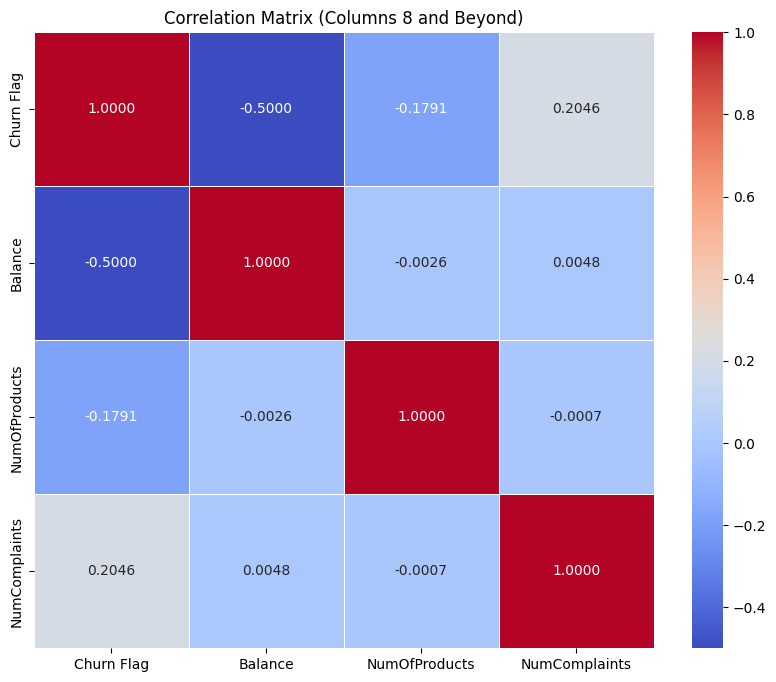

In [178]:
# Select columns from index 8 onwards
selected_columns = df.iloc[:, 8:]

# Compute the correlation matrix
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=.5)
plt.title('Correlation Matrix (Columns 8 and Beyond)')
plt.show()


*  <p style="color: black; font-size: 14px;">
      <strong>Bu korelasyon sonuçları, her bir sayısal değişkenin "Churn Flag" ile olan ilişkisini göstermektedir. "Churn Flag" 1 ise müşteri churn etmiş, 0 ise müşteri bankada kalmaya devam etmiştir.</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>"Balance" ve "NumComplaints" churn üzerinde en belirgin etkiye sahip değişkenler olarak görünüyor. Düşük bakiyeli müşterilerin churn etme olasılığı daha yüksek, aynı zamanda şikayette bulunanların da churn oranı daha fazladır.</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>Kredi skoru ve kullanılan ürün sayısı da churn üzerinde zayıf bir negatif etkiye sahip yani kredi skoru ve kullanılan ürün sayısının  churn üzerinde bir miktar etkisi olduğunu, fakat çok güçlü bir belirleyici olmadıklarını ifade edebiliriz.</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>Kısaca, kredi skoru veya ürün sayısı arttıkça churn etme ihtimali azalıyor, ancak bu ilişki çok kuvvetli değildir.</strong>
  </p>
  
  


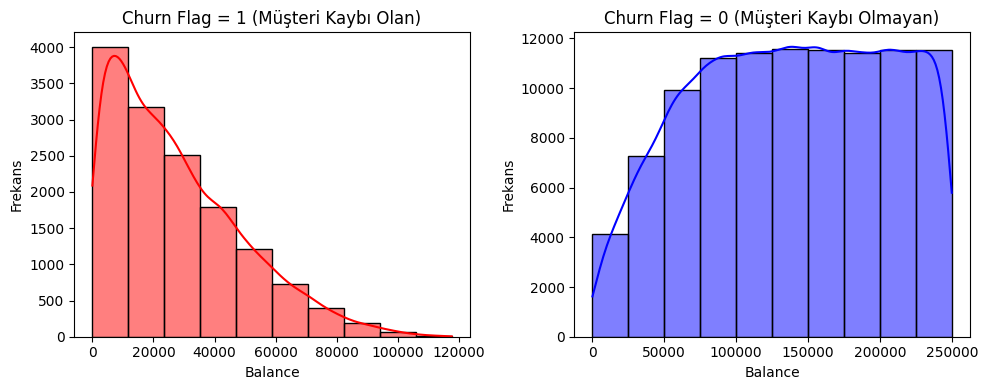

In [179]:
plt.figure(figsize=(10,4))

# Müşteri kaybı olanlar için histogram
plt.subplot(1, 2, 1)
sns.histplot(df[df['Churn Flag'] == 1]['Balance'], bins=10, kde=True, color='red')
plt.title('Churn Flag = 1 (Müşteri Kaybı Olan)')
plt.xlabel('Balance')
plt.ylabel('Frekans')

# Müşteri kaybı olmayanlar için histogram
plt.subplot(1, 2, 2)
sns.histplot(df[df['Churn Flag'] == 0]['Balance'], bins=10, kde=True, color='blue')
plt.title('Churn Flag = 0 (Müşteri Kaybı Olmayan)')
plt.xlabel('Balance')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

*  <p style="color: black; font-size: 14px;">
      <strong>Sol (Churn Flag = 1 ): Bu grafikte churn eden müşterilerin bakiye dağılımı gösterilmiş. Kırmızı histogram sağa çarpık bir dağılıma sahip, yani churn eden müşterilerin çoğu daha düşük bakiyelere sahipken, çok azı yüksek bakiyelere sahip. Bu, düşük bakiyeye sahip müşterilerin ayrılma olasılığının daha yüksek olduğunu gösteriyor.</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>Sağ (Churn Flag = 0 ): Churn etmeyen müşteriler için, mavi histogram oldukça düz bir dağılıma sahip, sadece çok düşük bakiyelere sahip müşterilerin sayısında önemli bir azalma var. Bu da yüksek bakiyeye sahip müşterilerin firmada kalma olasılığının daha yüksek olduğunu gösteriyor.</strong>
  </p>
  


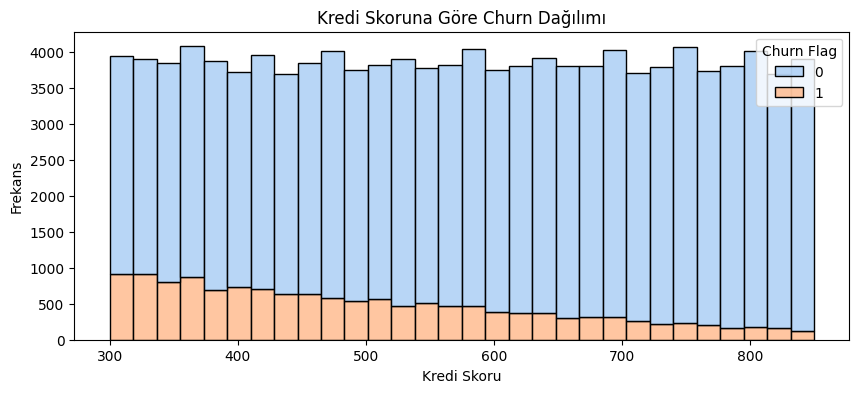

In [180]:
# Kredi skoruna göre churn durumunu göstermek için
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='Credit Score', hue='Churn Flag', multiple='stack', palette='pastel', bins=30)
plt.title('Kredi Skoruna Göre Churn Dağılımı')
plt.xlabel('Kredi Skoru')
plt.ylabel('Frekans')
plt.show()

*  <p style="color: black; font-size: 14px;">
      <strong>Churn oranı, kredi skoru arttıkça azalmaktadır. Bu da daha düşük kredi skoruna sahip müşterilerin churn etme olasılığının daha yüksek olduğunu, yüksek kredi skorlu müşterilerin ise firmada kalma olasılığının daha fazla olduğunu gösteriyor. Kredi skoru ile churn riski arasında ters bir ilişki bulunuyor.</strong>
  </p>

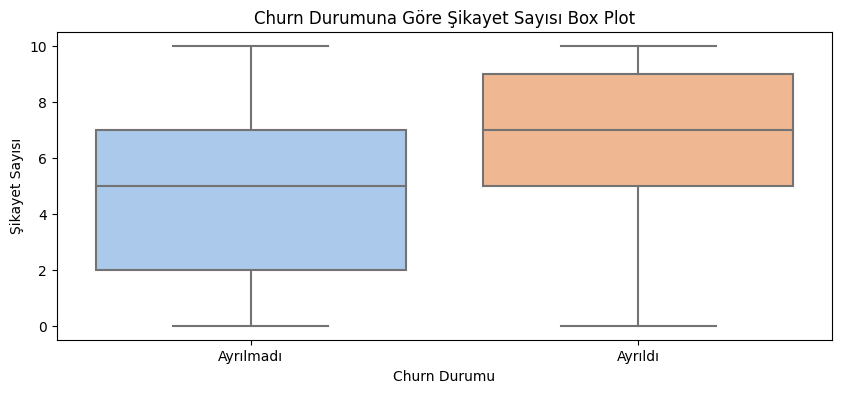

In [181]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Churn Flag', y='NumComplaints', data=df, palette='pastel')
plt.title('Churn Durumuna Göre Şikayet Sayısı Box Plot')
plt.xlabel('Churn Durumu')
plt.ylabel('Şikayet Sayısı')
plt.xticks([0, 1], ['Ayrılmadı', 'Ayrıldı'])
plt.show()

*  <p style="color: black; font-size: 14px;">
      <strong>Sol (Churn Flag = 0 - Ayrılmayanlar): Ayrılmayan müşteriler için şikayet sayısı genellikle 4-6 civarında toplanmış. Şikayet sayısı 0 ile 10 arasında değişmekte, ancak interquartile aralık (IQR) nispeten daha dar.</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>Sağ (Churn Flag = 1 - Ayrılanlar): Ayrılan müşterilerde medyan şikayet sayısı biraz daha yüksek (yaklaşık 6) ve genel aralık daha geniş. Bu da daha fazla şikayet eden müşterilerin ayrılma olasılığının daha yüksek olduğunu gösteriyor.</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>Daha fazla şikayet eden müşteriler ayrılma eğilimindedir.</strong>
  </p>

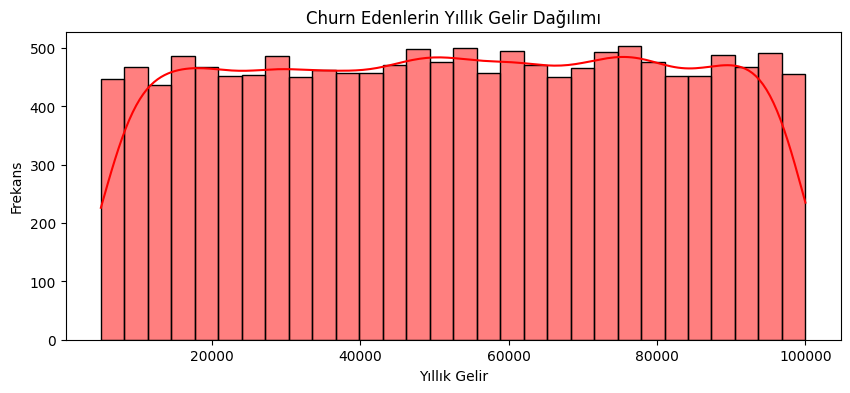

In [182]:
# Churn edenlerin verisini filtreleme
churned_customers = df[df['Churn Flag'] == 1]

plt.figure(figsize=(10, 4))
sns.histplot(churned_customers['Income'], bins=30, kde=True, color='red', palette='pastel')
plt.title('Churn Edenlerin Yıllık Gelir Dağılımı')
plt.xlabel('Yıllık Gelir')
plt.ylabel('Frekans')
plt.show()

*  <p style="color: black; font-size: 14px;">
      <strong>Ayrılan müşteriler için gelir dağılımını gösteren bu kırmızı histogram, gelir seviyeleri arasında neredeyse eşit bir dağılım olduğunu gösteriyor. Gelir, churn açısından güçlü bir belirleyici değil gibi görünüyor, çünkü farklı gelir gruplarından müşteriler eşit oranlarda churn ediyor.</strong>
  </p>



# <span style="color:pink">**Veri Ön İşleme**</span>

In [183]:
# Label Encoding
label_encoders = {}
for column in ['Gender', 'Marital Status','Preferred Communication Channel']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    
# One-Hot Encoding
categorical_columns_onehot = ['Education Level']
df_encoded = pd.get_dummies(df, columns=categorical_columns_onehot)

*  <p style="color: black; font-size: 14px;">
      <strong>Label Encoding sıralı veya az sayıda kategoriye sahip değişkenler için kullanıldı.Bunlar cinsiyet,evlilik durumu,tercih edilen iletişim kanalı gibi değişkenlerdir.</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>One-Hot Encoding sırasız ve daha fazla kategoriye sahip değişkenlerde tercih edildi.Eğitim seviyesi gibi.</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>Bu işlemler sonrasında tüm kategorik değişkenler sayısal değerlere dönüştürüldü, bu da algoritmaların bu verilerle çalışmasını sağladı.</strong>
  </p>


In [184]:
scaler = StandardScaler()
numeric_columns = ['Income', 'Customer Tenure', 'Credit Score', 'Outstanding Loans', 'Balance', 'NumOfProducts', 'NumComplaints']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


*  <p style="color: lightblue; font-size: 14px;">
      <strong>Özelliklerin standartlaştırılması sağlandı. Veriler, ortalaması 0 ve standart sapması 1 olacak şekilde dönüştürüldü</strong>
  </p>


In [185]:
# Özellikler ve hedef değişkenler
X = df_encoded.drop('Churn Flag', axis=1)
y = df_encoded['Churn Flag']

# Özellik Ölçekleme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train ve test seti ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


*  <p style="color: black; font-size: 14px;">
      <strong>Hedef değişken ayrılır ve özellikler ile hedef değişken eğitim ve test setlerine bölünür.</strong>
  </p>



# <span style="color:pink">**k-En Yakın Komşu (k-Nearest Neighbors - KNN) Sınıflandırıcısı**</span>

In [186]:
# KNN Modelini Eğitme
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Model Değerlendirme
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9381413582382105
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     30419
           1       0.83      0.62      0.71      4273

    accuracy                           0.94     34692
   macro avg       0.89      0.80      0.84     34692
weighted avg       0.93      0.94      0.93     34692



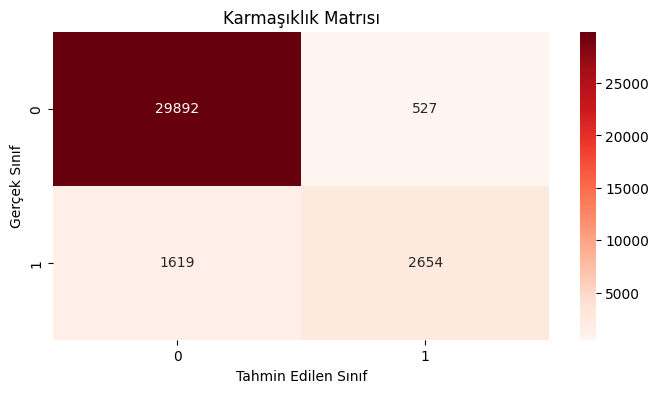

In [187]:
# Karmaşıklık Matrısı
cm = confusion_matrix(y_test, y_pred)

# Isı Haritası Oluşturma
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrısı')
plt.show()


*  <p style="color: black; font-size: 14px;">
      <strong>Model, test setindeki örneklerin yaklaşık %93.81'ini doğru tahmin etmiştir. Bu yüksek bir doğruluk oranıdır ve modelin genel olarak iyi performans gösterdiğini işaret ediyor.</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>Model churn etmeyenleri çok iyi tespit ediyor (yüksek precision ve recall).</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>Model churn edenleri tespit etmede daha az etkilidir. Recall değerinin düşük olması, churn edenlerin tamamını tespit etmede zorluk yaşadığını gösterir. Bu durum, churn edenleri daha iyi tahmin etmek için modelin daha fazla iyileştirilmesi gerektiğini gösterir.</strong>
  </p>

# <span style="color:pink">**Model Değerlendirme / Çapraz Doğrulama / Grid Search Optimizasyon**</span>

In [188]:
# Özellik Ölçekleme ve Model Pipeline
scaler = StandardScaler()
knn = KNeighborsClassifier()

# Çapraz Doğrulama
knn = KNeighborsClassifier()
pipeline = Pipeline([
    ('scaler', scaler),
    ('knn', knn)
])
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.94054825 0.94098063 0.94041854 0.94400726 0.93855932]
Mean CV Score: 0.9409028017986856


*  <p style="color: black; font-size: 14px;">
      <strong>Modelin çapraz doğrulama sonuçlarına göre ortalama doğruluk skoru yaklaşık 0.94. Bu, modelin veri setindeki örneklerin yaklaşık %94'ünü doğru tahmin ettiğini gösteriyor.</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>Çapraz doğrulama skorları birbirine oldukça yakın (0.938 ile 0.944 arasında). Bu, modelin farklı veri alt kümelerinde tutarlı bir performans sergilediğini gösterir.</strong>
  </p>

In [189]:
# Hiperparametre Optimizasyonu: Grid Search
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")


# En İyi Model ile Test Kümesinde Değerlendirme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Best Parameters: {'knn__n_neighbors': 11, 'knn__weights': 'distance'}
Best Cross-Validation Score: 0.9446904185402974
Test Accuracy: 0.9422345209270149
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20301
           1       0.90      0.59      0.71      2827

    accuracy                           0.94     23128
   macro avg       0.93      0.79      0.84     23128
weighted avg       0.94      0.94      0.94     23128



*  <p style="color: black; font-size: 14px;">
      <strong>Hiperparametre optimizasyonu, modelin performansını arttırdı ve çapraz doğrulama skorlarını %94.47'ye çıkardı. En iyi parametreler (n_neighbors=11 ve weights='distance') test setinde de başarılı bir performans gösterdi.</strong>
  </p>

*  <p style="color: black; font-size: 14px;">
      <strong>Model, test setinde yüksek bir doğruluk oranı sağlamaktadır ve churn etmeyen müşterileri yüksek başarı ile tahmin edebilmektedir.</strong>
  </p>

*  <p style="color: black; font-size: 14px;">
      <strong>Fakat halen Churn eden müşterileri tahmin etmede recall değeri düşüktür, bu da churn eden bazı müşterilerin yanlış sınıflandırıldığı anlamına geliyor.</strong>
  </p>

# <span style="color:pink">**k-Ortalama (k-Means) Kümeleme Algoritması**</span>

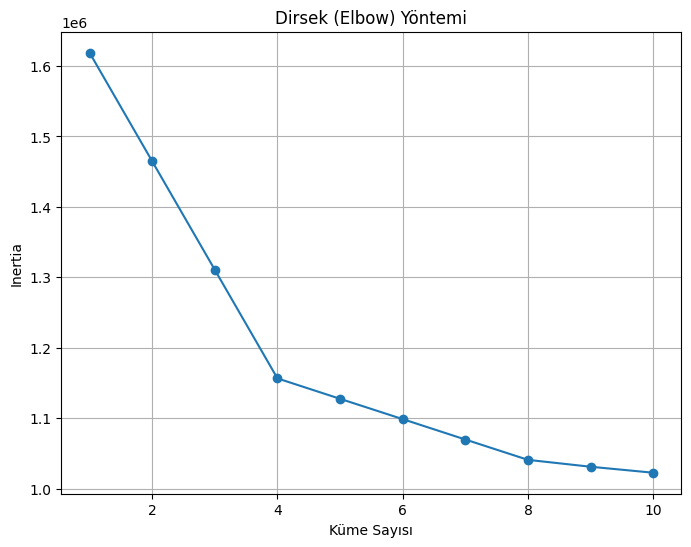

In [190]:
# Dirsek Metodu İçin KMeans Modelini Uygulama
inertia = []
k_range = range(1, 11)  # Örneğin 1'den 10'a kadar

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Dirsek Grafiğini Çizme
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia')
plt.title('Dirsek (Elbow) Yöntemi')
plt.grid(True)
plt.show()

*  <p style="color: black; font-size: 14px;">
      <strong>K-means ile müşterileri farklı özelliklerine ('Customer Tenure', 'Credit Score', 'Income', 'Cluster') göre gruplara ayırmaya çalıştım.Elbow Yöntemi ile optimal küme sayısı belirlendi.</strong>
  </p>
  
*  <p style="color: black; font-size: 14px;">
      <strong>Grafikte 4.kümeden sonra azalma hızı yavaşlıyor.Bu da en optimal kümenin 4.küme olduğunu gösteriyor.</strong>
  </p>

In [191]:
# K-Means algoritması için Churn Flag'i çıkarıyoruz
X_kmeans = df_encoded.drop('Churn Flag', axis=1)

# Özellik Ölçekleme (Tekrar ölçekleme yapıyoruz, çünkü KMeans ölçekli verilere ihtiyaç duyar)
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)

# K-Means algoritmasını uygulama (k = 4 olarak belirliyoruz, ihtiyacınıza göre değiştirebilirsiniz)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_kmeans_scaled)

# Kümeleri elde edelim
df_encoded['Cluster'] = kmeans.labels_


In [192]:
# İlk 10 satırı ve ilgili Cluster'ları göstermek için
print(df_encoded[['Customer Tenure', 'Credit Score', 'Income', 'Cluster']].head())

# Kümelerdeki veri dağılımını incelemek için gruplandırma
cluster_distribution = df_encoded['Cluster'].value_counts()
print(f"Kümelerdeki örnek dağılımı:\n{cluster_distribution}")


   Customer Tenure  Credit Score    Income  Cluster
0               30           397  77710.14        1
1               27           665  58209.87        1
2               14           715   9794.01        1
3               23           747  15088.98        1
4               22           549  60726.56        0
Kümelerdeki örnek dağılımı:
Cluster
0    28970
2    28950
1    28868
3    28852
Name: count, dtype: int64




*  <p style="color: black; font-size: 14px;">
      <strong>Küme dağılımına göre,kümelerdeki veri sayımız dengeli görünmemektedir.</strong>
    
*  <p style="color: black; font-size: 14px;">
      <strong>Mesela bir 0. clusterda 28970 müşteri varken, bir diğer kümede de  28852 müşteri bulunuyor.Bu dengeli kümeler olduğuna işaret ediyor gibi görünüyor fakat verilerimizin çoğunluklu olarak yoğunlaştığı bir cluster görünmemektedir.</strong>

In [193]:
# Silhouette Skoru
silhouette_avg = silhouette_score(X_kmeans_scaled, kmeans.labels_)
print(f'Silhouette Skoru: {silhouette_avg}')

Silhouette Skoru: 0.20097294796404813


*  <p style="color: black; font-size: 14px;">
      <strong>Silhouette Skoru 0.20 çıkti.Bu skorun 1 e değil de 0 a yakın olması kümeler arasında çok belirgin bir farkın olmadığını gösterir.Bunun sonucunda veri setimize daha fazla özellik ekleyebilir ya da var olan özellikler üzerinde iyileştirmeler yapılabilir.</strong>

# <span style="color:pink">**Modellerin Genel Değerlendirmesi**</span>

*  <p style="color: black; font-size: 14px;">
      <strong>Genel olarak K-means kümeleme algoritmasını incelediğimiz zaman istediğimiz başarıya ulaşamıyoruz.Müşterilerin kredi skorları, gelirleri ve müşteri hizmet süresi gibi özellikleri baz alarak kümelemeye çalışıldı. Ancak kümeleme sonucunda kümeler arasında çok büyük farklar görülmedi.</strong>
 
*  <p style="color: black; font-size: 14px;">
      <strong>Bu proje bir gözetimli bir de gözetimsiz öğrenme türü kullanıldı.Gözetimli olarak KNN Sınıflandırma ,gözetimsiz olarak ise K-means algoritması kullanıldı.</strong>
    
    
*  <p style="color: black; font-size: 14px;">
      <strong>KNN Sınıflandırma Algoritmasın da test setindeki örneklerin yaklaşık %93.81'ini doğru tahmin edildi.Bu modelimizin iyi bir şekilde öğrendiğini gösteriyor.Ayrıca cross validation ve hiper parametre optimizasyonu ile bu değer 0.94 e çıktı.Çok fazla bir artış olmasa da bu daha iyi bir accuracy değeri elde etmemize sebep oldu.Fakat Churn 0 için yüksek precision (0.95) ve recall (0.98) değerleri ile bu sınıf için iyi sonuçlar alıyorken
Sınıf 1 için precision (0.83) ve recall (0.62) değerlerini alıyoruz, bu da bu sınıf üzerinde modelin daha az başarılı olduğunu gösteriyor.Yani bu durum bize 1 sınıfındaki örneklerin(bankadan ayrılma durumu) doğru tahmin edilme oranının düşük olduğunu gösterir.</strong>
    
*  <p style="color: black; font-size: 14px;">
      <strong>K-means Kümeleme Algoritmasın da ise amacımız  benzer özelliklere sahip veri noktalarını bir araya getirmek ve aralarındaki farklılıkları ortaya koymak oldu. </strong>
    
*  <p style="color: black; font-size: 14px;">
      <strong>Elde edilen 0.20 olan Silhoutte skoru,kümelerin ayrışmasının net bir şekilde gerçekleşmediğini gösterdi.Müşteri kümeleri arasında belirgin ayrışmaların olmadığını gösterdi.</strong>
    
*  <p style="color: black; font-size: 14px;">
      <strong>Özet olarak çalıştığım bu veri setinin gözetimli öğrenme için daha çok uygun olduğunu gördüm.Çünkü veri seti daha çok Churn Flag ve diğer değişkenler arasındaki ilişkiyi göstermekte güçlüydü.Diğer özelliklerin birbiri ile ilişkisi daha zayıftı.Bu da diğer özelliklerin kullanılıp modelin Churn Flag'ı tahmin etmesinde gözetimli öğrenmenin daha etkili olacağı görülür.</strong>
    
